In [1]:
# Import libraries
from IPython.display import Markdown as md
import sympy
import numpy as np
import matplotlib.pyplot as plt

# Nyquist stability plot for feedback control

In control systems, one way to determine whether a controller will result in a stable response (in other words, the controlled variable remains finite), is to draw a Nyquist diagram. We represent the relationship between the input variable $ u $ and the output variable $ x $ in the Laplace domain using a transfer function $ G(s) $:

$$ x = G(s)u $$

To determine whether the process will be closed-loop stable, we plot the *frequency domain transfer function* $ G(iω) $ over the frequency $ ω ∈ (-∞, ∞) $ on the imaginary plane. If this plot encircles the point (-1, 0), then the system will be *unstable*. However, if the point (-1,0) is not encircled, then the system will be stable.

In the example below, we plot the Nyquist diagram, as well as the time-domain response of the closed-loop system following a step change in the input. The transfer function is given by:

$$ G(s) = \frac{K(s-2)}{(s+4)(s+10)} $$

We evaluate the case where $ K = 15 $ and where $ K = 22$.

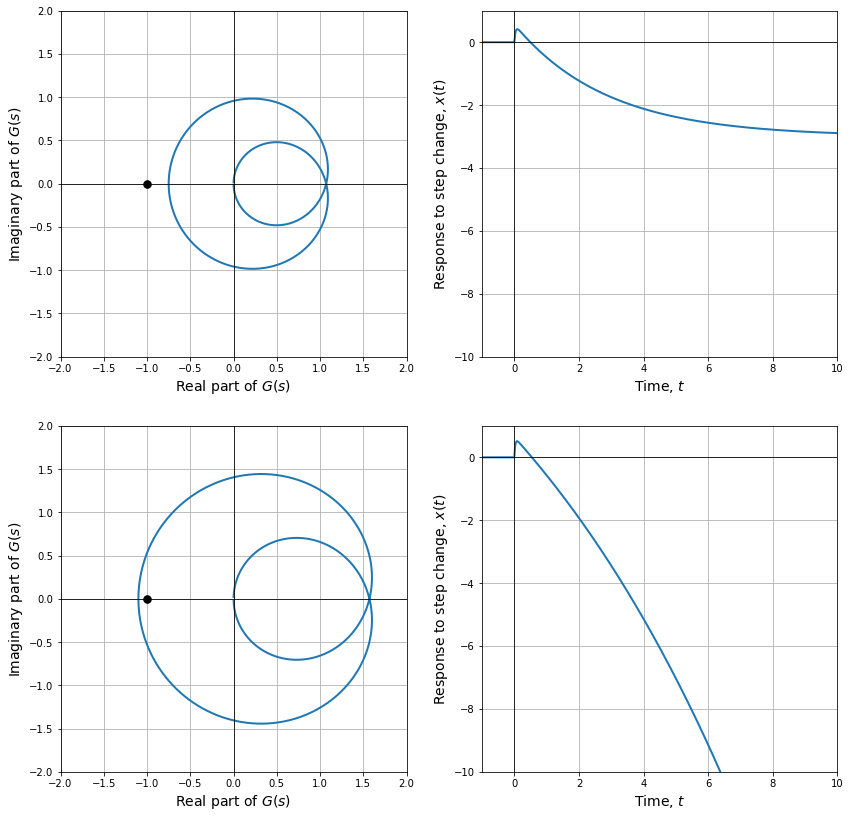

In [2]:
# Define symbolic variables
t, s = sympy.symbols('t, s')

# Define a function that will return a lambda function of the open-loop transfer function 
# as well as the time domain response following a step change in the input
def InvertLaplaceTransform(G):
    G_closed_loop = sympy.apart( sympy.simplify(G/(1+G)) )
    g = sympy.inverse_laplace_transform( G_closed_loop *1/s, s, t)

    return sympy.lambdify(s, G), sympy.lambdify(t, g)

# Define the frequency range used to draw the Nyquist plot
w_RHS = np.logspace(-2, 3, 1000)
w_LHS = -np.flip(w_RHS)
w = np.concatenate((w_LHS, w_RHS))

# Define the time range over which to plot the time-domain response
t_vec = np.linspace(-1, 10, 1000)

# Create the figures to be used later
fig, ax = plt.subplots(2,2)
fig.set_size_inches(14,14)

# Define the first open-loop transfer function and find the corresponding lambda functions
G = 15*(s-2)/( (s+4)*(s+10) )
numerical_G, numerical_g = InvertLaplaceTransform(G)

# Plot the results
ax[0,0].plot(np.real(numerical_G(1j*w)), np.imag(numerical_G(1j*w)), lw = 2)
ax[0,0].plot(-1, 0, 'k.', ms = 15)
ax[0,1].plot(t_vec, numerical_g(t_vec), lw = 2)

# Define the second open-loop transfer function and find the corresponding lambda functions
G = 22*(s-2)/( (s+4)*(s+10) )
numerical_G, numerical_g = InvertLaplaceTransform(G)

# Plot the results
ax[1,0].plot(np.real(numerical_G(1j*w)), np.imag(numerical_G(1j*w)), lw = 2)
ax[1,0].plot(-1, 0, 'k.', ms = 15)
ax[1,1].plot(t_vec, numerical_g(t_vec), lw = 2)

# Cosmetics
for j in range(2):
    ax[j,0].axhline(y=0, color='k', lw = 0.8)
    ax[j,0].axvline(x=0, color='k', lw = 0.8)
    ax[j,0].grid(True)
    ax[j,0].set_aspect('equal')
    ax[j,0].set_xlim(left = -2, right = 2)
    ax[j,0].set_ylim(bottom = -2, top = 2)
    ax[j,0].set_xlabel('Real part of $  G(s) $', fontsize = 14)
    ax[j,0].set_ylabel('Imaginary part of $ G(s) $', fontsize = 14)

    ax[j,1].axhline(y=0, color='k', lw = 0.8)
    ax[j,1].axvline(x=0, color='k', lw = 0.8)
    ax[j,1].grid(True)
    ax[j,1].set_xlim(left = t_vec[0], right = t_vec[-1])
    ax[j,1].set_ylim(bottom = -10, top = 1)
    ax[j,1].set_xlabel('Time, $ t $', fontsize = 14)
    ax[j,1].set_ylabel('Response to step change, $ x(t) $', fontsize = 14)
